# Discrete Inverse Problems and Regularisation

In this section we consider inverse problems that can be posed as a system of linear equations

$$
Ku = f,
$$

with $K \in \mathbb{R}^{m\times n}$ a given matrix and $f\in \mathbb{R}^{m}$ the data. The goal is to find a solution $u \in \mathbb{R}^n$ that (approximately) satisfies the equations.

## Well-posedness
The first questions we adress in detail are those of *existence*, *uniqueness* and *stability* of the solution.

* If $m = n$ and $K$ has full rank, it is invertible and the solution is given by

$$
\widetilde u = K^{-1}f.
$$

* If $m > n$ and $K$ has rank $n$, the system of equations may be *inconsistent* in which case a solution does not exist because $f$ is not in the range of $K$.

* If $m < n$ and $K$ has rank $m$, we can always find a solution but it may not be unique because $K$ has a *null-space*.

* If $K$ does not have maximal rank, the system of equations may be both inconsistent and $K$ can have a null-space.

Stability in this context means that errors in the data do not get amplified too much. For now, we'll only consider stability in case the solution exists and is unique, in which case we have

$$
\|\widetilde u - \widetilde u^{\delta}\| = \|K^{-1}(f - f^{\delta})\| \leq \|K^{-1}\| \|f - f^{\delta}\|.
$$

Since $\|f\| = \|K\widetilde u\| \leq \|K\| \|\widetilde u\|$, we can express the *relative error* as

$$
\frac{\|\widetilde u - \widetilde u^{\delta}\|}{\|\widetilde u\|} \leq  \|K\|\|K^{-1}\| \frac{\|f - f^{\delta}\|}{\|f\|}.
$$

The quantity $\kappa(K) = \|K\|\|K^{-1}\|$ is called the *condition number* of $K$. When $K$ is invertible, we have $\kappa_2(K) = \|K\|_2\|K^{-1}\|_2 = \sigma_1/\sigma_n$.

## Pseudo inverse and regularization
If $m > n$, the system is inconsistent when $f$ is not in the range of $K$. If $K$ has full rank we can express it as

$$
K = U_n \Sigma_n V_n^*.
$$

We can then attempt to solve a modified system of equations

$$
K u =  U_nU_n^* f,
$$

where $U_nU_n^* f$ projects $f$ onto the range of $K$. We find

$$
\widetilde u = V_n\Sigma_n^{-1}U_n^*f = K^\dagger f.
$$

This coincides with the *least-squares* solution

$$
\min_u \|Ku - f\|_2^2 .
$$

Indeed, by setting the gradient to zero, we find

$$
K^* K u  = K^* f,
$$

so

$$
\widetilde u = (K^* K)^{-1}K^* f = K^{\dagger}f.
$$

If, on the other hand $m < n$ and $K$ has full rank, a solution exists but is not unique. In this case, we can look for the smallest solution (i.e., one that does not have any contributions in the null-space of $K$).  This means we look for a solution that is spanned by the first $m$ columns of $V$

$$
K V_m z = f,
$$

with $\widetilde u = V_m z$. We find that this solution is given by

$$
\widetilde{u} = V_m\Sigma_m^{-1}U_m^*f =  K^{\dagger}f.
$$

Showing that this indeed yields the solution with the smallest norm is the subject of one of the assignments. The corresponding variational form is

$$
\min_{u} \|u\|_2^2 \quad \text{such that} \quad Ku = f.
$$

Dealing with such constraints will be the topic of a later lecture.

If the matrix does not have full rank we may still employ the pseudo-inverse, which in general is defined as

$$
K^{\dagger} = V_k\Sigma_k^{-1}U_k^{*},
$$

where $k$ denotes the rank of the matrix.

Note that the pseudo inverse allows us to define a unique solution, it is not necessarily stable as $\|K\|_2\|K^{\dagger}\|_2 = \sigma_1/\sigma_k$ may still be large.

 To study this issue in more detail, express the solution as
 
$$
\widetilde{u} = V_k\Sigma_k^{-1}U_k^{*}f = \sum_{i=1}^k \frac{u_i^*f}{\sigma_i}v_i.
$$

We note the component in $f$ corresponding to $v_i$ is amplified by $\sigma_i^{-1}$. Thus if $f$ has (noise) components that correlate with $v_i$'s corresponding to very small singular values, these noise components get amplified. Generally, we do not expect problems if $|v_i^*f|$ decays faster with $i$ than the singular values $\sigma_i$. This is called the *discrete Picard condition*.

To stabilize the problem we can modify the pseudo inverse in several ways to avoid dividing by small singular values. One option is to simply ignore small singular values and choose a cut-off value and define the solution as

$$
\widetilde u_{\alpha} = V_{k}r_{\alpha}(\Sigma_{k}){U_{k}}^*f,
$$

where $r$ computes the regularized inverse:

$$
r_{\alpha}(\sigma) =
\left\{
\begin{array}{ccc}
\sigma^{-1} & \text{if} \quad \sigma \geq \alpha \\
0 & \text{otherwise} \\
\end{array}
\right.
$$

This gives

$$
\widetilde u_{\alpha} = \sum_{i=1}^{k_{\alpha}} \frac{u_i^*f}{\sigma_i}v_i,
$$

where $k_{\alpha}$ is chosen so that $\sigma_i \geq \alpha$ for $i \leq k_{\alpha}$. This is called the *truncated singular value decomposition* (TSVD).

Another option is to add small positive constant to shift the singular values away from zero

$$
r_{\alpha}(\sigma) = \frac{s}{s^2 + \alpha}.
$$

Stability of this type of modification follows by considering the largest singular value of the matrix $V_{k}r_{\alpha}(\Sigma_{k})U_{k}^{*}$, which can be made arbitrarily small by increasing $\alpha$.

The latter type of regularization is known as *Tikhonov regularization* and corresponds to the following variational formulation

$$
\min_u \|Ku - f\|_2^2 + \alpha \|u\|_2^2.
$$

Indeed, the solution is given by

$$
\widetilde{u}_{\alpha} = \left(K^* K + \alpha I\right)^{-1}K^* f = V_k\left(\Sigma_k^2 + \alpha I\right)^{-1}\Sigma_k {U_k}^*f,
$$

Note that $K^* K + \alpha I$ has full rank whenever $\alpha > 0$. Hence, the solution to this regularized problem exists and is unique.

A final consideration when introducing such regularization is the *bias-variance tradeoff*. Here, we compare the regularized solution from noisy data $\widetilde{u}_{\alpha, \delta} = K_{\alpha}^\dagger f^{\delta}$ and the ideal solution $\widetilde{u} = K^{\dagger}f$:

$$
\|\widetilde u - \widetilde u_{\alpha, \delta}\| \leq \underbrace{\|(K^\dagger - K_{\alpha}^\dagger)f\|}_{\text{bias}} + \underbrace{\|K_{\alpha}^\dagger(f - f^{\delta})\|}_{\text{variance}}.
$$

If $\alpha \downarrow 0$, the bias goes to zero, but possibly leads to a large variance. Large $\alpha$ on the other hand reduces the variance but leads to a large bias. Ideally, the regularization parameter is chosen in such a way that the small singular values are stabilized and the large ones are hardly effected.

## Exercises

### Pseudo-inverse

Show that for a given matrix $K \in \mathbb{R}^{m\times n}$:

1. $KK^\dagger$ is an orthogonal projection on to the range of $K$
2. $I - K^\dagger K$ is an orthogonal projection to to the null-space of $K$

### Least-squares and minimum-norm solutions:
Given a system of equations $Ku = f$ with $K\in\mathbb{R}^{m\times n}$:

1. For $m > n$ and rank($K$) = $n$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest residual $\|Ku - f\|_2$

2. For $m < n$ and rank($K$) = $m$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest norm $\|u\|_2$

3. For $m > n$ and rank($K$) = $r < n$, show that the pseudo-inverse gives the solution that minimizes both $\|Ku - f\|_2$ and $\|u\|_2$.

### Gravity surveying

We can estimate the density distribution in the subsurface by measuing the local gravitational pull. The density profile $u(x)$ is related to such measurements by a linear operator
$$Ku(x) = \int_0^1 \frac{u(y)}{(1 + (x-y)^2)^{3/2}} \mathrm{d}y.$$
Upon discretization with stepsize $h = 1/n$, the inverse problem can be cast as a system of $n$ equations in $n$ unknowns $Ku = f$.

1. Use the code provided below to generate the matrix and compute its SVD (use `np.linalg.svd`)
3. Plot the coefficients $\langle u_i, f\rangle$ and the singular values $\sigma_i$ to check the discrete Picard condition. What do you notice ?

2. Solve the inverse problem for noisy data using the (regularized) pseudo-inverse; compute the optimal $\alpha$ by computing the bias and variance components of the error.


In [1]:
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

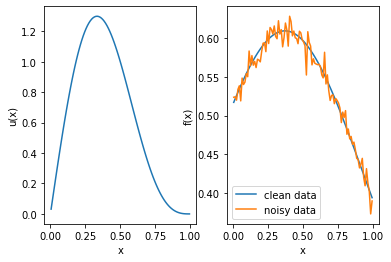

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# define forward operator
n = 100
delta = 1e-2
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot ground truth and data
fig, axs = plt.subplots(1,2)

axs[0].plot(x,u)
axs[0].set_xlabel('x')
axs[0].set_ylabel('u(x)')

axs[1].plot(x,f,label='clean data')
axs[1].plot(x,f_delta,label='noisy data')

axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()

plt.show()

### Convolution

We are going to solve a deconvolution problem $Ku = f$, where $K$ is a *Toeplitz matrix* with elements
$$k_{ij} = \frac{\exp({-a\cdot (i-j)^2})}{(n-1)\sqrt{\pi/a}},$$ 
and we are given noisy measurements 
$$f^{\delta} = Ku + e,$$
where the entries of $e$ are normally distrubuted with mean zero and variance $\delta^2$.

The goal of this assignment is to solve this inverse problem using a (truncated) SVD for two scenario's

1. $u(x) = H(x - 0.3) - H(x - 0.7)$ 
2. $u(x) = x(1-x)$

For each of the two scenarios answer the following questions:

1. Is this problem ill-posed?
2. Compute the (pseudo-)inverse of $K$ using the SVD and compute the backward error $|u - u^{\delta}|_2$ for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's; what do you notice?
3. Compute a regularized solution using a truncated SVD for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's. Manually choose the truncation paramater $k$ in each case to get the best possible solution. What do you notice here?
4. Explain your observations by investigating what the singular vectors look like (think about the discrete Picard condition as well).

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

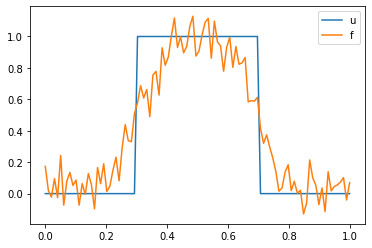

In [9]:
# parameters and grid
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)

# define forward operator
c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

# ground truth and data
u = abs(x - 0.5)<.2
f = K@u + delta*np.random.randn(n)

# plot
plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()

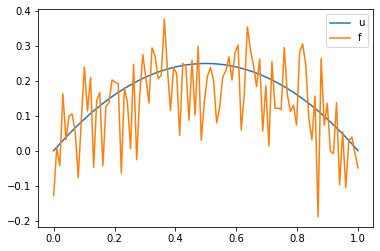

In [11]:
# parameters and grid
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)

# define forward operator
c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

# ground truth and data
u = x*(1-x)
f = K@u + delta*np.random.randn(n)

# plot
plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()